# Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
tes = pd.read_csv('../Capstone_csv_file/tes_final_salary_17-18')
tes.head()

,NAME,final_rank,salary
0,Travis Kelce,1.0,9368400
1,Rob Gronkowski,2.0,9000000
2,Evan Engram,3.0,2679576
3,Zach Ertz,5.0,8500000
4,Kyle Rudolph,6.0,7300000


In [4]:
X = tes['final_rank']
y = tes['salary']

In [5]:
tes['Mean_Yhat'] = tes['salary'].mean()

In [6]:
 def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [7]:
MSE(y, tes['Mean_Yhat'])

7812111765147.404

In [8]:
np.sqrt(MSE(y, tes['Mean_Yhat']))

2795015.521450177

In [9]:
def line_of_best_fit(x, y):

    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    beta_1 = r_xy * std_y / std_x
    beta_0 = y_bar - beta_1 * x_bar

    return beta_1 * x + beta_0

In [10]:
tes['Linear_Yhat'] = line_of_best_fit(X, y)

In [11]:
tes.head()

,NAME,final_rank,salary,Mean_Yhat,Linear_Yhat
0,Travis Kelce,1.0,9368400,4716432.0,6.211130e+06
1,Rob Gronkowski,2.0,9000000,4716432.0,6.163356e+06
2,Evan Engram,3.0,2679576,4716432.0,6.115583e+06
3,Zach Ertz,5.0,8500000,4716432.0,6.020036e+06
4,Kyle Rudolph,6.0,7300000,4716432.0,5.972263e+06


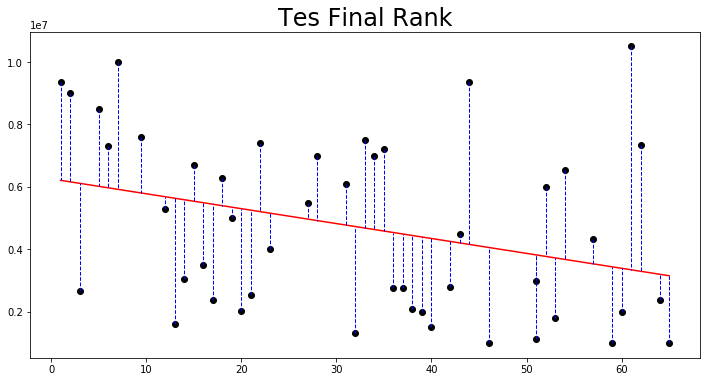

In [12]:
plt.figure(figsize=(12,6))

plt.scatter(X,
            y,
            color = 'black')

plt.plot(X,
         tes['Linear_Yhat'],
         color = 'red')

for i, row in tes.iterrows():
    plt.plot((row['final_rank'], row['final_rank']),
             (row['salary'], row['Linear_Yhat']),
             color = 'blue',
             linestyle = '--',
             lw=1)

    plt.title('Tes Final Rank', fontsize = 24);

In [13]:
model = LinearRegression()

In [14]:
X = tes[['final_rank']]
y = tes['salary']

In [15]:
X.shape

(47, 1)

In [16]:
y.shape

(47,)

In [17]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = model.predict(X)

In [19]:
np.sqrt(MSE(y, y_pred))

2645546.4026048924

In [20]:
model.intercept_

6258903.02707541

In [21]:
model.coef_

array([-47773.40248603])

In [22]:
r2_score(y, y_pred)

0.10409426045844228